# Clean and Analyze Employee Exit Surveys

In this project, we will work with exit surveys from employees of the Department of Education, Training, and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The TAFE exit survey can be found [here]('https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey') and the DETE survey can be found [here]('https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey').

We will play the role of data analyst and attempt to answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We will combine results from both surveys to answer these questions.

In [1]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
print(dete_survey.shape)
print(tafe_survey.shape)

(822, 56)
(702, 72)


In [7]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [8]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Based on our initial exploration of these datasets, it is clear that they are quite different from each other. The number and nature of the columns in each dataset differ drastically. We will attempt to clean and combine these datasets to make them more usable.

We can observe that the dete_survey dataframe contains 'Not Stated' values. These indicate that a value is missing, but they are not represented as NaN. We can fix this by mapping 'Not Stated' to NaN when we import our dataframe.

In [9]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

Since we are only concerned with identifying the correlation between job dissatisfaction and employee tenure/employee age, there are many columns in each dataframe that we do not need for our analysis. Let's drop the columns that are not relevant to the task at hand.

In [10]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [11]:
print(dete_survey_updated.shape)
print(tafe_survey_updated.shape)

(822, 35)
(702, 23)


Next we need to turn our attention to the column names. Many columns have different names in each dataframe. We need to make these consistent so that we can eventually combine the two dataframes into a single dataframe. First, let's clean up the column headings of the `dete_survey_updated` dataframe to make them more consistent.

In [12]:
print(dete_survey_updated.columns)
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'int

Now, let's rename some of the column headings of the `tafe_survey_updated` dataframe to make them easier to read and work with.

In [13]:
print(tafe_survey_updated.columns)

col_map = {'Record ID':'id', 'CESSATION YEAR':'cease_date', 'Reason for ceasing employment':'separationtype', 
           'Gender. What is your Gender?':'gender', 'CurrentAge. Current Age':'age', 
           'Employment Type. Employment Type':'employment_status', 'Classification. Classification':'position', 
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service'}

tafe_survey_updated = tafe_survey_updated.rename(col_map, axis=1)

print(tafe_survey_updated.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [14]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [15]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


As a reminder, the goal of this project is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

Below, we will inspect the unique values of the 'separationtype' column in each dataframe.

In [16]:
print(dete_survey_updated['separationtype'].unique())
print(tafe_survey_updated['separationtype'].unique())

['Ill Health Retirement' 'Voluntary Early Retirement (VER)'
 'Resignation-Other reasons' 'Age Retirement' 'Resignation-Other employer'
 'Resignation-Move overseas/interstate' 'Other' 'Contract Expired'
 'Termination']
['Contract Expired' 'Retirement' 'Resignation' 'Retrenchment/ Redundancy'
 'Termination' 'Transfer' nan]


The values for 'separationtype' that we are interested are those that contain 'Regisgnation', because we are only interested in employees who left their jobs voluntarily. Note that the `dete_survey_updated` dataframe has multiple values containing the word 'Resignation'. We need to be sure that we keep all three. Note that we invoke the `df.copy()` method to avoid a SettingWithCopy Warning.

In [17]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [18]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [19]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()

In [20]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [21]:
print(dete_resignations.shape)
print(tafe_resignations.shape)

(311, 35)
(340, 23)


Before we continue cleaning and manipulating our data, let's verify that the 'cease_date' and 'dete_start_date' columns make sense. Neither should be later than the current year (2019), and they probably shouldn't be earlier than 1940 or so. Let's check for values that are outside of this range.

In [22]:
dete_resignations['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [23]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(str).str[-4:].astype(float)

In [24]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
NaN        11
Name: cease_date, dtype: int64

In [25]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64

In [26]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
NaN         5
Name: cease_date, dtype: int64

After cleaning the 'cease_date' column in the `dete_resignations` dataframe and inspecting each column, it appears that the start and end dates in both dataframes are valid. Since we are interested in the years of service for each employee, we need to created a 'institute_service' column in the `dete_resignations` dataframe to correspond with the 'institue_service' column in the `tafe_resignations` dataframe.

In [27]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [28]:
dete_resignations['institute_service'].value_counts(dropna=False)

NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
12.0     6
22.0     6
17.0     6
10.0     6
14.0     6
16.0     5
18.0     5
24.0     4
23.0     4
11.0     4
39.0     3
32.0     3
19.0     3
21.0     3
36.0     2
30.0     2
25.0     2
28.0     2
26.0     2
29.0     1
42.0     1
38.0     1
27.0     1
41.0     1
35.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

In [29]:
tafe_resignations['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

Now that we can identify how long each employee has been with their respective institute, we need to determine which employees were dissatisfied with their job when they resigned from their positions. We will create a new 'dissatisfied' column, and assign it as true if any of the following columns are True:

**tafe_resignations:**
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

**dafe_resignations:**
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload


In [30]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [31]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [32]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [33]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[
    ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [34]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [35]:
tafe_resignations_up['dissatisfied'] = tafe_resignations_up[['Contributing Factors. Job Dissatisfaction', 
                                                       'Contributing Factors. Dissatisfaction']].any(axis=1, skipna=False)

In [36]:
dete_resignations_up['dissatisfied'] = dete_resignations_up[['job_dissatisfaction', 'dissatisfaction_with_the_department', 
                                                       'physical_work_environment', 'lack_of_recognition', 
                                                      'lack_of_job_security', 'work_location', 'employment_conditions', 
                                                       'work_life_balance', 'workload']].any(axis=1, skipna=False)

In [37]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [38]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [39]:
print(dete_resignations_up.shape)
print(tafe_resignations_up.shape)

(311, 37)
(340, 24)


We are ready to combine our columns. However, we first need to add a column to each dataframe that will allow us to distinguish between the two when they are combined.

In [40]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

Now, we will combine our dataframes. We will still have some columns that we don't need to complete our analysis. Thus, we will delete any columns with less than 500 non-null values.

In [41]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], sort=False, ignore_index=True)

In [42]:
print(combined.shape)

(651, 53)


In [43]:
combined_updated = combined.dropna(axis=1, thresh=500)

In [44]:
print(combined_updated.shape)

(651, 10)


In [45]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


After combining our dataframes and inspecting the 'institute_service' column, we recognize that the data is not formatted consistently.

In [46]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2
27.0                   1


To analyze the data, we will convert the 'institute_service' column into categories based on career stage. We'll use the categories below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

Before we can categorize the data, we need to make sure the data is in a consistent format. There are two formats of entries we need to fix ('1-2', 'Less than 1 year'). We will address each of these cases below and then break the employees into the above categories based on years served.

In [47]:
combined_updated.loc[combined_updated['institute_service'].astype(str).str.contains('year'), 'institute_service'] = (
    combined_updated['institute_service'].astype(str).str.split().str[2].astype(float))

C:\Users\Cuyler\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [48]:
combined_updated.loc[combined_updated['institute_service'].astype(str).str.contains('-'), 'institute_service'] = (
    combined_updated['institute_service'].astype(str).str.split('-').str[1].astype(float))

In [49]:
combined_updated['institute_service'].value_counts(dropna=False)

1.0     95
NaN     88
4.0     79
2.0     78
6.0     50
20.0    43
10.0    27
5.0     23
0.0     20
3.0     20
9.0     14
7.0     13
8.0      8
13.0     8
15.0     7
22.0     6
12.0     6
14.0     6
17.0     6
18.0     5
16.0     5
23.0     4
24.0     4
11.0     4
19.0     3
39.0     3
32.0     3
21.0     3
36.0     2
25.0     2
26.0     2
28.0     2
30.0     2
38.0     1
41.0     1
35.0     1
34.0     1
42.0     1
27.0     1
29.0     1
31.0     1
33.0     1
49.0     1
Name: institute_service, dtype: int64

We can see from the above table that the 'institute_service' column is now consistenly formatted. We can proceed with categorizing the employees.

In [50]:
# Function to categorize an employee based on number of years served
def categorize_years(years):
    if pd.isnull(years):
        return "Unknown"
    elif years < 3.0:
        return "New"
    elif 3.0 <= years <= 6.0:
        return "Experienced"
    elif 7.0 <= years <= 10:
        return "Established"
    else:
        return "Veteran"

In [53]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(categorize_years)

C:\Users\Cuyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
Unknown         88
Established     62
Name: service_cat, dtype: int64

We now have our service categories identified for each employee. Next, we need to make sure that our 'dissatisfied' column is ready to be used in our analysis.

In [55]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We have 8 NaN values. Since this is a small percentage of the total employees, we will just go ahead and fill these values as False, the most common value in the column.

In [56]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

C:\Users\Cuyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

Now, we can calculate the percentage of dissatisfied employees in each of our service categories.

In [72]:
pv_dissatisfied = combined_updated.pivot_table(values='dissatisfied', index='service_cat').sort_values('dissatisfied')
pv_dissatisfied

,dissatisfied
service_cat,
New,0.295337
Unknown,0.295455
Experienced,0.343023
Veteran,0.485294
Established,0.516129


In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

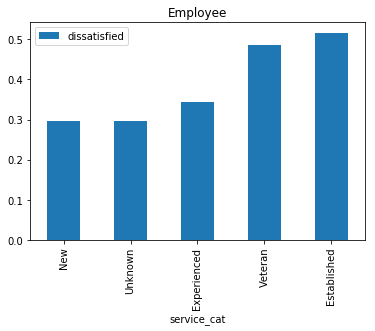

In [74]:
pv_dissatisfied.plot(kind='bar')
plt.title('Employee')
plt.show()

As shown in the pivot table and bar plot above, the employee category with the highest percentage of dissatisfied employees are 'Established' (7-10 years of service) and 'Veteran' (11+ years of service). Employees categorized as 'New' (less than 3 years of service) actually had the lowest rate of satisfaction of any group. This implies that employees who resign after being with their respective institute for a short time are less likely to reseign due to dissatisfaction with their jobs than those which have been with their institute for a longer time.